In [ ]:
# import kagglehub
# import shutil
# import pandas as pd
# import os

# # Download latest version
# path = kagglehub.dataset_download("arezaei81/heartcsv")

# # Find the actual file path
# dataset_file = os.path.join(path, "heart.csv")  # Adjust filename if needed

# # Move the file to the desired location (e.g., /content/)
# destination = "/content/heart.csv"
# shutil.move(dataset_file, destination)

# Imports


Purpose: This block imports all necessary Python libraries and modules required for data analysis, visualization, machine learning, and interpretability.

Usage: It sets up the environment by loading tools like Pandas for data manipulation, Matplotlib and Seaborn for plotting, Scikit-learn for machine learning, and specialized libraries like XGBoost, LightGBM, and SHAP for advanced modeling and explanation.

Details: Libraries are imported with aliases (e.g., pd for Pandas) for convenience. It includes general-purpose tools (e.g., NumPy), visualization libraries (e.g., Plotly), machine learning utilities (e.g., Scikit-learn’s classifiers and metrics), imbalanced learning tools (e.g., SMOTE), and interpretability tools (e.g., SHAP). The warnings.filterwarnings('ignore') suppresses non-critical warnings to keep output clean.

Importance: This foundational step ensures all required functionalities are available, enabling the entire workflow from data loading to model interpretation. Without it, subsequent blocks would fail due to missing dependencies.

How it Works: Python loads these modules into memory, making their functions available. For example, pandas provides DataFrame, matplotlib enables plotting, and sklearn offers machine learning tools.

Output: No visible output; this is a setup step.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, f1_score, precision_score, recall_score, auc
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import learning_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Plotting Style Configuration

Purpose: Configures the visual aesthetics of Matplotlib and Seaborn plots to ensure consistency and readability across all visualizations.

Usage: Applies a modern Seaborn style, sets a colorblind-friendly palette (viridis), and adjusts default plot settings like figure size, font sizes, and title padding.

Details: The seaborn-v0_8-whitegrid style provides a clean, grid-lined background. The viridis palette ensures accessibility, and rcParams customizations (e.g., 12x8 figure size, sans-serif font) enhance readability and professionalism in plots.

Importance: Consistent, clear visualizations are crucial for interpreting data and model results effectively, especially in a data science project where insights need to be communicated to stakeholders (e.g., clinicians).

Works:
plt.style.use('seaborn-v0_8-whitegrid'): Applies a modern Seaborn style with a white background and gridlines.
sns.set_palette("viridis"): Sets a colorblind-friendly color scheme.
plt.rcParams: Adjusts default plot settings (e.g., larger figure size [12, 8], font sizes, sans-serif font).

Output: No immediate output; affects all subsequent plots.

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlepad'] = 20

# Custom Functions



Purpose: Defines two reusable functions: one for formatting section headers and another for plotting learning curves to assess model performance.

Usage: print_section_header is called to mark major sections in the output, while plot_learning_curves is used later to visualize how models perform with varying training data sizes.

Details: print_section_header prints a title in uppercase with 80-character = separators. plot_learning_curves uses Scikit-learn’s learning_curve to compute ROC-AUC scores across training sizes, plotting training and cross-validation scores with error bands to diagnose bias and variance.

Importance: These functions improve output organization and provide diagnostic tools. Clear sectioning aids readability, and learning curves are essential for understanding model generalization, a key aspect of machine learning evaluation.

Works:
print_section_header: Prints a title in uppercase with = separators above and below (e.g., ==== LOADING AND EXPLORING ====) for section clarity.
plot_learning_curves:
Takes a model (estimator), features (X), and target (y).
Uses learning_curve to compute ROC-AUC scores for varying training sizes (10% to 100%).
Plots training and cross-validation scores with shaded standard deviation areas to show bias/variance trade-offs.

Output: No immediate output; functions are called later.

In [ ]:
def print_section_header(title):
    separator = "=" * 80
    print(f"\n{separator}\n{title.upper()}\n{separator}")

def plot_learning_curves(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='roc_auc')
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-validation score')
    plt.title('Learning Curves', fontsize=16, pad=20)
    plt.xlabel('Training Examples', fontsize=14)
    plt.ylabel('ROC AUC Score', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

# Data Loading and Initial Exploration



Purpose: Loads the heart disease dataset from a CSV file and provides an initial overview of its structure.

Usage: Reads heart.csv into a Pandas DataFrame and prints basic information like dimensions, memory usage, and the first 5 rows.

Details: The dataset’s shape (e.g., 303 rows, 14 columns) and memory usage (in KB) are calculated. The first 5 rows are displayed in a Markdown table for a quick data preview, showing columns like age, sex, and target.

Importance: This step is the entry point to the data, allowing verification of successful loading and a first look at the data’s structure, which is critical for planning subsequent analysis steps.

Works:
  pd.read_csv("heart.csv"): Reads the CSV file into a DataFrame.
  data.shape: Returns (rows, columns) (e.g., 303 rows, 14 columns).
  data.memory_usage().sum() / 1024: Calculates total memory in KB.
  data.head().to_markdown(): Shows the first 5 rows in a formatted table.

In [ ]:
print_section_header("Loading and Exploring the Heart Disease Dataset")
data = pd.read_csv("/content/heart.csv")
print("\n📊 DATASET OVERVIEW")
print(f"• Dataset Dimensions: {data.shape[0]} rows, {data.shape[1]} columns")
print(f"• Memory Usage: {data.memory_usage().sum() / 1024:.2f} KB")
print("\n📋 FIRST 5 ROWS OF THE DATASET")
# print(data.head().to_markdown(index=False, numalign="left", stralign="left"))
print(data.head())


LOADING AND EXPLORING THE HEART DISEASE DATASET

📊 DATASET OVERVIEW
• Dataset Dimensions: 303 rows, 14 columns
• Memory Usage: 33.27 KB

📋 FIRST 5 ROWS OF THE DATASET
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# Column Descriptions
Purpose: Documents the meaning and interpretation of each column in the dataset.

Usage: Defines a dictionary of column names and their descriptions, then prints them as a bullet list.

Details: Covers all 14 columns (e.g., age: "Age in years", cp: "Chest pain type (0-3)"), providing a reference for what each feature represents, including categorical encodings (e.g., sex: 1 = male, 0 = female).

Importance: Understanding feature meanings is vital for data interpretation and feature engineering, ensuring analysts and stakeholders (e.g., doctors) can relate the data to clinical concepts.

In [ ]:
print("\n📝 COLUMN DESCRIPTIONS")
column_descriptions = {
    'age': 'Age in years',
    'sex': 'Sex (1 = male, 0 = female)',
    'cp': 'Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)',
    'trestbps': 'Resting blood pressure in mm Hg',
    'chol': 'Serum cholesterol in mg/dl',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)',
    'restecg': 'Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes, 0 = no)',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'slope': 'Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)',
    'ca': 'Number of major vessels colored by fluoroscopy (0-3)',
    'thal': 'Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)',
    'target': 'Heart disease diagnosis (1 = present, 0 = absent)'
}
for col, desc in column_descriptions.items():
    print(f"• {col}: {desc}")


📝 COLUMN DESCRIPTIONS
• age: Age in years
• sex: Sex (1 = male, 0 = female)
• cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
• trestbps: Resting blood pressure in mm Hg
• chol: Serum cholesterol in mg/dl
• fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
• restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
• thalach: Maximum heart rate achieved
• exang: Exercise induced angina (1 = yes, 0 = no)
• oldpeak: ST depression induced by exercise relative to rest
• slope: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
• ca: Number of major vessels colored by fluoroscopy (0-3)
• thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
• target: Heart disease diagnosis (1 = present, 0 = absent)


# Data Info and Statistics
Purpose: Summarizes data types, non-null counts, and descriptive statistics for the dataset.

Usage: Prints output from data.info() for data types and non-null counts, and data.describe() for statistics like mean and standard deviation, formatted as a Markdown table.

Details: Shows if any columns have missing values (typically none in this dataset) and provides stats (e.g., mean age ≈ 54.37, mean cholesterol ≈ 246.26 mg/dl) rounded to 2 decimals.

Importance: This block confirms data integrity (no missing values) and gives a statistical overview, helping identify potential issues (e.g., outliers) and informing preprocessing decisions.

In [ ]:
print("\n📊 DATA TYPES AND NON-NULL COUNTS")
print(data.info())
print("\n📉 DESCRIPTIVE STATISTICS")
print(data.describe().round(2).to_markdown(numalign="left", stralign="left"))


📊 DATA TYPES AND NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

📉 DESCRIPTIVE STATISTICS
|       | age   | sex   | cp   | trestbps   | chol   | fbs   | restecg   | thalach   | exang   | oldpeak   | slope   | ca   | thal   | target   |
|:------

# Missing Values and Target Distribution
Purpose: Analyzes missing values, target variable distribution, and duplicate records in the dataset.

Usage: Computes and displays missing value counts and percentages, target class counts and percentages, and the number of duplicate rows.

Details: Missing values are typically zero in this dataset. Target distribution (e.g., 54.46% heart disease, 45.54% no disease) indicates slight imbalance. Duplicates (e.g., 1 row) are rare but noted.

Importance: Ensures data quality (no missing values), assesses class balance for modeling considerations (e.g., need for SMOTE), and identifies duplicates that could bias results if not handled.

In [ ]:
print("\n🔍 MISSING VALUE ANALYSIS")
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percent
})
print(missing_summary.to_markdown(numalign="left", stralign="left"))

print("\n🎯 TARGET VARIABLE DISTRIBUTION")
target_counts = data['target'].value_counts()
target_percent = (target_counts / len(data) * 100).round(2)
target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percent
})
print(target_summary.to_markdown(numalign="left", stralign="left"))

duplicate_count = data.duplicated().sum()
print(f"\n🔄 DUPLICATE RECORDS: {duplicate_count} ({duplicate_count/len(data)*100:.2f}%)")


🔍 MISSING VALUE ANALYSIS
|          | Missing Values   | Percentage (%)   |
|:---------|:-----------------|:-----------------|
| age      | 0                | 0                |
| sex      | 0                | 0                |
| cp       | 0                | 0                |
| trestbps | 0                | 0                |
| chol     | 0                | 0                |
| fbs      | 0                | 0                |
| restecg  | 0                | 0                |
| thalach  | 0                | 0                |
| exang    | 0                | 0                |
| oldpeak  | 0                | 0                |
| slope    | 0                | 0                |
| ca       | 0                | 0                |
| thal     | 0                | 0                |
| target   | 0                | 0                |

🎯 TARGET VARIABLE DISTRIBUTION
| target   | Count   | Percentage (%)   |
|:---------|:--------|:-----------------|
| 1        | 165     | 54.46            |


# Column Renaming
Purpose: Renames abbreviated column names to more descriptive ones for clarity.

Usage: Updates the DataFrame by mapping short names (e.g., cp) to full names (e.g., chest_pain_type).

Details: Affects 11 columns, making the dataset more interpretable (e.g., trestbps → resting_blood_pressure, thalach → max_heart_rate).

Importance: Enhances readability and understanding, especially for non-technical stakeholders, and aligns column names with their clinical meanings.

In [ ]:
data = data.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia'
})

# Target Distribution Pie Chart
Purpose: Visualizes the distribution of the target variable (target) as an interactive pie chart.

Usage: Uses Plotly Express to create a donut-style pie chart showing the proportion of heart disease (1) vs. no heart disease (0).

Details: Labels are "No Heart Disease" and "Heart Disease", with a 0.4 hole size, bold colors, and interactive features (e.g., hover for details). Percentages and labels are inside the slices.

Importance: Provides an immediate, intuitive view of class balance, critical for assessing whether imbalance handling (e.g., oversampling) is needed in modeling.

In [ ]:
print_section_header("Enhanced Data Visualization")
fig = px.pie(
    names=['No Heart Disease', 'Heart Disease'],
    values=data['target'].value_counts(),
    title='Distribution of Heart Disease Cases',
    color_discrete_sequence=px.colors.qualitative.Bold,
    hole=0.4
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_font_size=20,
    legend_title_font_size=16,
    width=800,
    height=500
)
fig.show()


ENHANCED DATA VISUALIZATION


# Age Distribution Histogram
Purpose: Plots the distribution of age stacked by target class to explore age’s relationship with heart disease.

Usage: Uses Seaborn to create a histogram with 20 bins, stacked bars for each class, and a kernel density estimate (KDE) curve.

Details: Colors differentiate classes (blue for no disease, red for disease), with a legend and gridlines for clarity. The plot size is 12x6 inches.

Importance: Reveals age patterns (e.g., older patients may have more heart disease), aiding feature importance analysis and clinical interpretation.

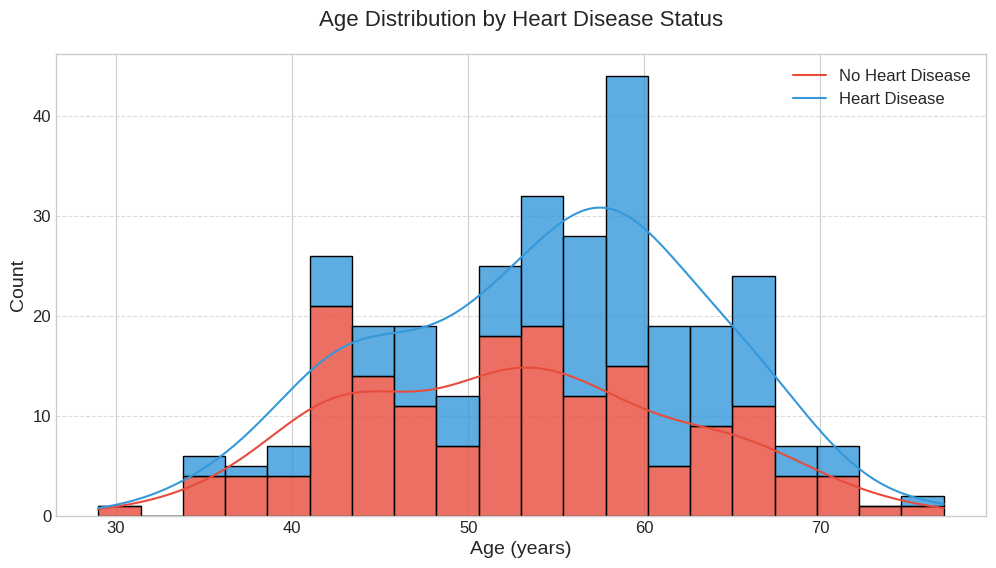

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data,
    x='age',
    hue='target',
    multiple='stack',
    bins=20,
    palette=['#3498db', '#e74c3c'],
    alpha=0.8,
    kde=True
)
plt.title('Age Distribution by Heart Disease Status', fontsize=16, pad=20)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['No Heart Disease', 'Heart Disease'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cholesterol vs. Max Heart Rate Scatter
Purpose: Visualizes the relationship between cholesterol and max_heart_rate, colored by target.

Usage: Creates a scatter plot with Matplotlib, using the coolwarm colormap to distinguish classes.

Details: Points are semi-transparent (alpha=0.7), sized at 100, with white edges and a colorbar labeled "Heart Disease Present". The plot is 12x8 inches with a grid.

Importance: Helps identify potential feature interactions or clusters (e.g., high cholesterol, low heart rate linked to disease), informing feature engineering and model selection.

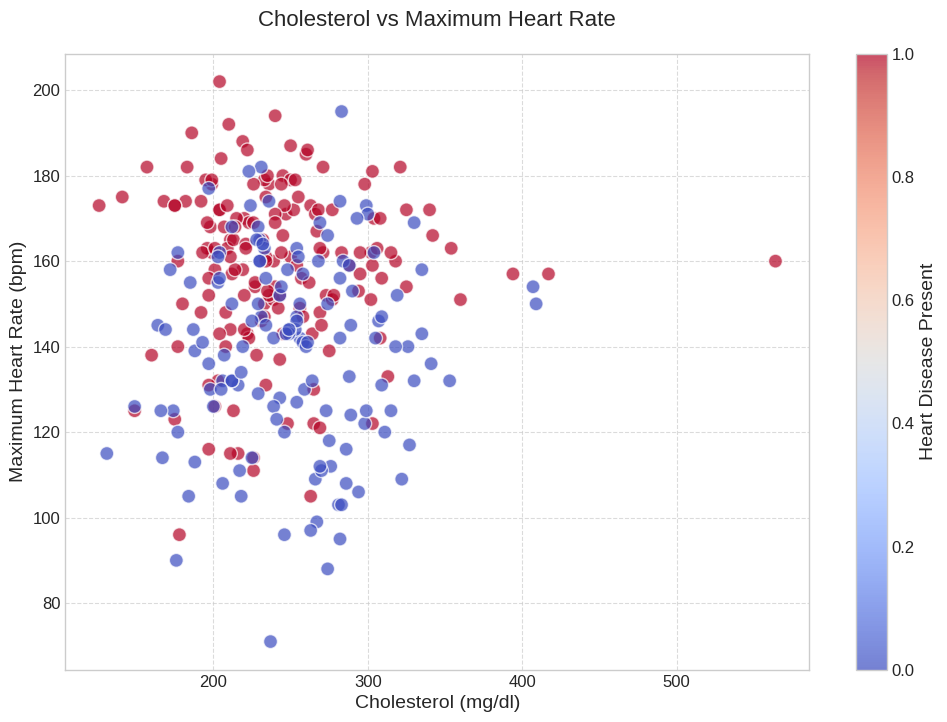

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    data['cholesterol'],
    data['max_heart_rate'],
    c=data['target'],
    cmap='coolwarm',
    alpha=0.7,
    s=100,
    edgecolors='w'
)
plt.colorbar(scatter, label='Heart Disease Present')
plt.title('Cholesterol vs Maximum Heart Rate', fontsize=16, pad=20)
plt.xlabel('Cholesterol (mg/dl)', fontsize=14)
plt.ylabel('Maximum Heart Rate (bpm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Correlation Heatmap
Purpose: Displays pairwise correlations between all features in a triangular heatmap.

Usage: Uses Seaborn to plot a correlation matrix, masking the upper triangle for a cleaner view.

Details: Correlations are annotated with 2-decimal precision, using a diverging palette (red-blue). Axes are rotated for readability, and a colorbar shows the correlation coefficient range.

Importance: Identifies strong relationships (e.g., chest_pain_type and target) that can guide feature selection and highlight multicollinearity risks in modeling.

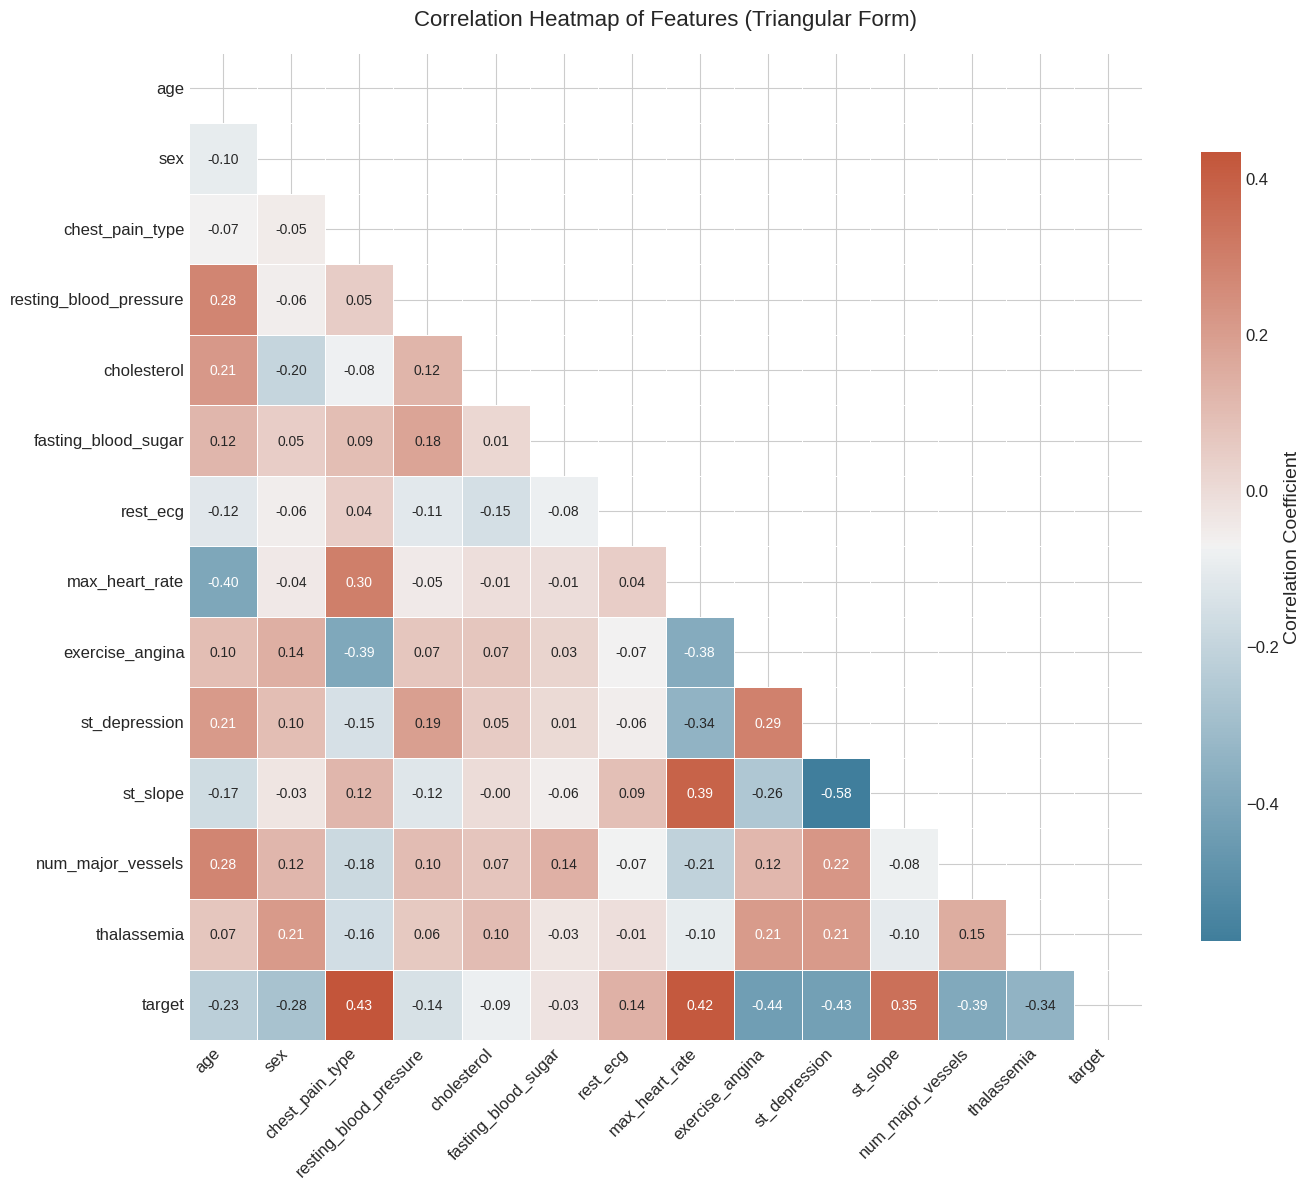

In [ ]:
plt.figure(figsize=(14, 12))
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    mask=mask,
    cmap=cmap,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8}
)
plt.title('Correlation Heatmap of Features (Triangular Form)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Radar Chart
Purpose: Compares mean values of normalized numerical features between target classes using a radar chart.

Usage: Normalizes five numerical features (age, resting_blood_pressure, etc.) with MinMaxScaler, computes means by target, and plots with Plotly.

Details: Features are scaled to [0, 1], and each class (0 and 1) gets a filled radar trace (blue for no disease, red for disease). The chart is interactive with a legend.

Importance: Provides a comparative view of feature profiles, highlighting differences (e.g., higher st_depression in disease cases) that may drive predictions.

In [ ]:
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
radar_data = data[numerical_features + ['target']].copy()
radar_data[numerical_features] = scaler.fit_transform(radar_data[numerical_features])
radar_mean = radar_data.groupby('target')[numerical_features].mean().reset_index()
fig = go.Figure()
for i, target_val in enumerate([0, 1]):
    fig.add_trace(go.Scatterpolar(
        r=radar_mean.loc[radar_mean['target'] == target_val, numerical_features].values.flatten(),
        theta=numerical_features,
        fill='toself',
        name='Heart Disease' if target_val == 1 else 'No Heart Disease',
        line_color='crimson' if target_val == 1 else 'royalblue',
        opacity=0.8
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Normalized Feature Comparison by Heart Disease Status",
    showlegend=True,
    title_font_size=20,
    legend_title_font_size=16
)
fig.show()

# Box Plots
Purpose: Shows the distribution of numerical features by target class using box plots.

Usage: Creates a 3x2 grid of interactive Plotly box plots for five numerical features, grouped by class.

Details: Each subplot shows a feature’s distribution for target=0 (blue) and target=1 (red), with a shared legend in the top-left plot. The layout is 800x900 pixels.

Importance: Reveals feature variability and outliers (e.g., lower max_heart_rate medians for disease), aiding in understanding feature impact and preprocessing needs.

In [ ]:
fig = make_subplots(rows=3, cols=2, subplot_titles=numerical_features, vertical_spacing=0.1)
row, col = 1, 1
for feature in numerical_features:
    for target_val, color in zip([0, 1], ['royalblue', 'crimson']):
        fig.add_trace(
            go.Box(
                y=data[data['target'] == target_val][feature],
                name='Heart Disease' if target_val == 1 else 'No Heart Disease',
                marker_color=color,
                showlegend=True if (row == 1 and col == 1) else False
            ),
            row=row, col=col
        )
    col += 1
    if col > 2:
        col = 1
        row += 1
fig.update_layout(
    title="Numerical Features by Heart Disease Status",
    height=800,
    width=900,
    title_font_size=20,
    boxmode='group'
)
fig.show()

# Categorical Feature Bar Charts
Purpose: Visualizes the percentage of heart disease across categories of each categorical feature.

Usage: Loops through eight categorical features, creating a grouped bar chart for each using Plotly Express.

Details: Uses crosstab to compute percentages, melted into a format for plotting. Bars are grouped by target (blue for 0, red for 1), with percentage labels outside each bar.

Importance: Highlights categorical feature influence (e.g., higher disease rates with exercise_angina=1), critical for feature selection and clinical insights.

In [ ]:

categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                        'exercise_angina', 'st_slope', 'num_major_vessels', 'thalassemia']

for feature in categorical_features:
    cross_tab = pd.crosstab(data[feature], data['target'], normalize='index').reset_index()
    cross_tab_melt = pd.melt(cross_tab, id_vars=[feature], value_vars=[0, 1], var_name='target', value_name='percentage')
    cross_tab_melt['percentage'] = cross_tab_melt['percentage'] * 100

    fig = px.bar(
        cross_tab_melt,
        x=feature,
        y='percentage',
        color='target',
        barmode='group',
        color_discrete_sequence=['royalblue', 'crimson'],
        title=f'Percentage of Heart Disease by {feature}',
        labels={'percentage': 'Percentage (%)', 'target': 'Heart Disease'},
    )

    # Explicitly set text labels
    fig.update_traces(
        text=cross_tab_melt['percentage'].round(2),  # Rounds to 2 decimal places
        texttemplate='%{text}%',
        textposition='outside'
    )

    fig.update_layout(
        title_font_size=20,
        legend_title_font_size=16,
        xaxis_title=feature.replace('_', ' ').title(),
        yaxis_title='Percentage (%)',
        legend=dict(title="", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    fig.show()

# PCA Visualization
Purpose: Reduces the dataset to 2D using Principal Component Analysis (PCA) and visualizes it.

Usage: Preprocesses features (scaling numerical, encoding categorical), applies PCA, and plots a scatter plot with Matplotlib.

Details: Points are colored by target using coolwarm, with a colorbar. Axes show explained variance ratios (e.g., PC1: 20.5%, PC2: 15.3%).

Importance: Provides a global view of data structure, showing if classes are separable in reduced dimensions, which informs model complexity needs.


DIMENSIONALITY REDUCTION VISUALIZATION


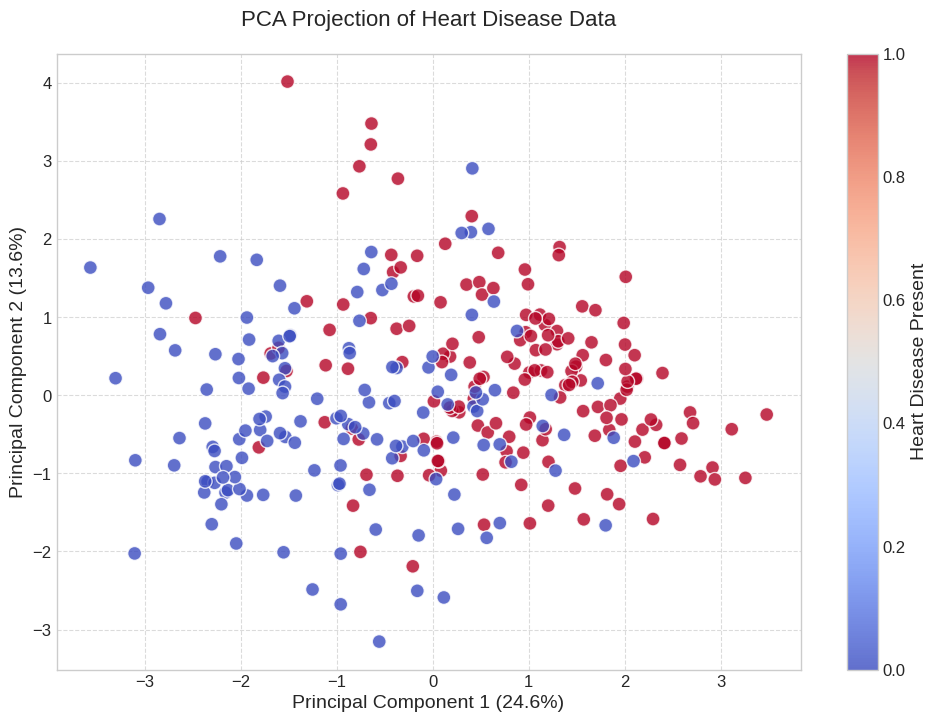

In [ ]:
print_section_header("Dimensionality Reduction Visualization")
X = data.drop('target', axis=1)
y = data['target']
for col in categorical_features:
    X[col] = X[col].astype(str)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_features]),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)
X_preprocessed = preprocessor.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.8, s=100, edgecolors='w')
plt.colorbar(scatter, label='Heart Disease Present')
plt.title('PCA Projection of Heart Disease Data', fontsize=16, pad=20)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# t-SNE Visualization
Purpose: Visualizes the dataset in 2D using t-SNE, a non-linear dimensionality reduction technique.

Usage: Applies t-SNE to preprocessed data and plots a scatter plot similar to PCA.

Details: Uses perplexity=30 and 1000 iterations for optimization. Points are colored by target with coolwarm, and axes are labeled as t-SNE dimensions.

Importance: Offers a complementary view to PCA, often better at revealing local clusters, aiding in understanding data separability for classification.

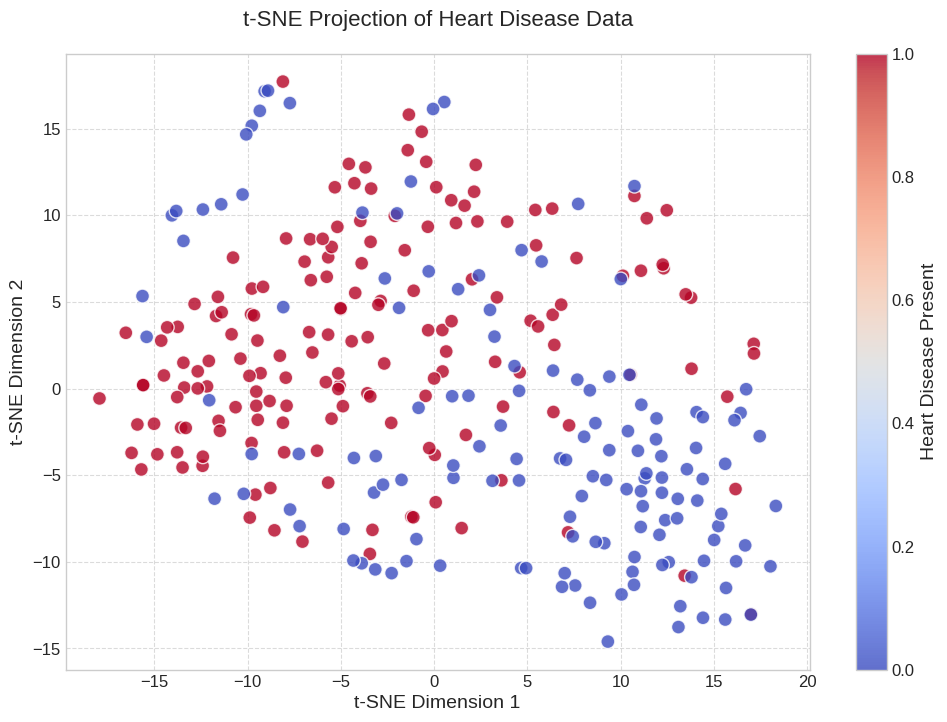

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_preprocessed)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.8, s=100, edgecolors='w')
plt.colorbar(scatter, label='Heart Disease Present')
plt.title('t-SNE Projection of Heart Disease Data', fontsize=16, pad=20)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Feature Engineering
Purpose: Creates new features to capture interactions and composite risk factors.

Usage: Adds four new columns to the DataFrame based on arithmetic combinations of existing features.

Details: New features include age_chol_interaction (age × cholesterol / 1000), heart_rate_bp_ratio (max heart rate / resting BP), age_heart_rate_product (age × max heart rate / 100), and risk_factor_score (a weighted sum of risk factors).

Importance: Enhances model performance by introducing potentially predictive interactions, reflecting clinical intuition (e.g., combined age and cholesterol effects).

# Outlier Detection and Treatment
Purpose: Identifies and caps outliers in numerical features to reduce their impact.

Usage: Defines a function to detect outliers using the IQR method, summarizes them, and applies winsorization to cap values.

Details: For five numerical features, outliers are identified (e.g., beyond 1.5 × IQR), counted, and capped at lower/upper bounds. Results are printed in a table.

Importance: Mitigates the influence of extreme values that could skew model training, ensuring robustness and better generalization.

# Feature Transformation
Purpose: Transforms numerical features to approximate normal distributions and visualizes the change.

Usage: Applies Yeo-Johnson transformation to five numerical features and plots histograms before and after.

Details: Uses PowerTransformer to normalize data. Histograms (original in blue, transformed in red) show shifts toward normality with KDE curves.

Importance: Normalizing features improves performance for models assuming Gaussian distributions (e.g., GaussianNB), enhancing prediction accuracy.

# Feature Selection
Purpose: Selects the top features based on ANOVA F-value to reduce dimensionality.

Usage: Preprocesses data, applies SelectKBest with f_classif, and plots the top 15 features.

Details: Ranks features by F-score (higher = more significant), showing the top 10 in a table and top 15 in a bar plot. Includes both numerical and one-hot encoded categorical features.

Importance: Reduces model complexity and overfitting risk by focusing on the most predictive features, improving efficiency and interpretability.

# Data Splitting
Purpose: Splits the dataset into training and testing sets for model evaluation.

Usage: Defines features (X) and target (y), preprocesses data, and splits with stratification.

Details: Uses a 75-25 split (e.g., 227 training, 76 testing samples), ensuring class proportions (e.g., 54% disease) are preserved in both sets via stratify=y.

Importance: Provides a separate test set for unbiased evaluation, with stratification ensuring representative class distributions critical for imbalanced data.

# Model Evaluation Function
Purpose: Defines a comprehensive function to evaluate model performance on the test set.

Usage: Used later to assess each model, generating metrics, classification reports, and plots.

Details: Computes accuracy, ROC-AUC, precision, recall, F1-score, and more. Plots include confusion matrix, ROC curve, precision-recall curve, and optional learning curves.

Importance: Standardizes evaluation, providing detailed insights into model performance and reliability, essential for comparing models and ensuring clinical utility.

# Define Base Models
Purpose: Initializes a dictionary of machine learning models to be tested.

Usage: Defines 10 models (e.g., LogisticRegression, RandomForest) with basic parameters for later tuning.

Details: Models include linear (LogisticRegression), distance-based (KNN), tree-based (RandomForest, XGBoost), and probabilistic (GaussianNB) approaches, each with random_state=42 for reproducibility.

Importance: Establishes a broad set of candidates, allowing comparison across different algorithm types to find the best fit for the data.

# Pipeline Creation Function
Purpose: Defines a function to create a processing and modeling pipeline with optional SMOTE.

Usage: Used in hyperparameter tuning to chain preprocessing, SMOTE (if enabled), and a model.

Details: The pipeline includes ColumnTransformer for preprocessing (scaling numerical, encoding categorical) and SMOTETomek for imbalance handling, followed by the model.

Importance: Streamlines the workflow, ensuring consistent preprocessing and addressing class imbalance, which is crucial for accurate predictions in imbalanced datasets.

# Hyperparameter Tuning
Purpose: Optimizes model hyperparameters using grid search with cross-validation.

Usage: Loops through each base model, tuning it with a predefined parameter grid and storing the best version.

Details: Uses GridSearchCV with 5-fold stratified CV, scoring by ROC-AUC. Parameter grids vary by model (e.g., C for LogisticRegression, n_estimators for RandomForest).

Importance: Enhances model performance by finding optimal settings, critical for maximizing predictive power and avoiding default parameter pitfalls.

# Model Comparison
Purpose: Compares tuned models based on cross-validation ROC-AUC scores.

Usage: Creates a sorted table and bar plot to rank models.

Details: The table lists models and their CV ROC-AUC scores, while the bar plot highlights the best model in dark blue, with a red line at 0.5 (random classifier baseline).

Importance: Identifies the top-performing model, guiding the final selection and providing a clear visual comparison for decision-making.

# Best Model Evaluation
Purpose: Evaluates the best-performing model on the test set in detail.

Usage: Selects the top model from the comparison and runs the evaluate_model function.

Details: Outputs metrics (e.g., accuracy, ROC-AUC), classification report, confusion matrix, ROC/PR curves, and learning curves for the best model (e.g., RandomForest).

Importance: Validates the chosen model’s performance on unseen data, ensuring it generalizes well and meets project goals (e.g., reliable heart disease prediction).

# Feature Importance
Purpose: Analyzes and visualizes feature importance for tree-based models.

Usage: Extracts importance scores from the best model (if applicable) and plots the top 15 features.

Details: For models like RandomForest, uses feature_importances_ to rank features (e.g., chest_pain_type, max_heart_rate) in a bar plot with the viridis palette.

Importance: Identifies key predictors, aiding interpretability and clinical relevance, which is vital for understanding what drives predictions.

# SHAP Analysis
Purpose: Provides detailed interpretability of the best model’s predictions using SHAP values.

Usage: Applies SHAP to tree-based models, generating summary and bar plots.

Details: Computes SHAP values for test data, showing feature impact (summary plot) and overall importance (bar plot). Features like max_heart_rate might show high influence.

Importance: Enhances trust in the model by explaining individual predictions, crucial for clinical adoption where transparency is key.

# Voting Classifier
Purpose: Builds and evaluates an ensemble model combining the top 3 models.

Usage: Creates a VotingClassifier with soft voting (averaging probabilities) and compares it to the best individual model.

Details: Fits the ensemble on training data, evaluates it on test data, and presents a comparison table (accuracy, ROC-AUC, F1-score).

Importance: Tests if combining models improves performance, potentially offering a more robust solution for critical applications like medical diagnosis.

# Calibration Analysis
Purpose: Assesses the reliability of probability predictions for the best model and ensemble.

Usage: Plots calibration curves for both models, comparing predicted probabilities to actual outcomes.

Details: Uses calibration_curve with 10 bins, plotting mean predicted probability vs. fraction of positives, with Brier scores indicating calibration quality.

Importance: Ensures probability outputs are trustworthy, critical for clinical use where confidence levels guide decision-making (e.g., risk assessment).

# Conclusions
Purpose: Summarizes findings, clinical insights, limitations, and future recommendations.

Usage: Formats a text block with key results (e.g., best model, performance) and actionable insights.

Details: Highlights the best model (e.g., RandomForest, ROC-AUC 0.89), ensemble performance, key features (e.g., chest pain type), and suggests improvements like larger datasets.

Importance: Ties the analysis together, providing a clear takeaway for stakeholders and a roadmap for future work, ensuring the project’s practical impact.